<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/bird_flu_dataset_avian_influenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

In [1]:
data_dir = f'jasmeet0516/bird-flu-dataset-avian-influenza'

# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/jasmeet0516/bird-flu-dataset-avian-influenza
License(s): MIT
100% 245k/245k [00:00<00:00, 805kB/s]
100% 245k/245k [00:00<00:00, 804kB/s]


In [9]:
import os
file_names = os.listdir()
zip_file = next((file for file in file_names if file.endswith('.zip')), None)
zip_file

'bird-flu-dataset-avian-influenza.zip'

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['Avian Influenza (HPAI).csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [14]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [15]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [16]:
df.head()

_id          Scientific_Name            Common_Name                 Date  \
0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

   Year  Month  Day  Time  Country Country_State_County      State  County  \
0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
2  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
3  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
4  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   

               Locality  Latitude  Longitude           Parent_Species  \
0  Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
1  Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
2  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
3  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
4  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   

   target_H5_HPAI  
0               0  
1               0  
2               0  
3               0  
4               0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

In [18]:
fig = aka_plot.Plot_histogram_Features(df,[1,8,10,11,16,7,2,3],fig_size_row=600)
if fig is not None:
    fig.show()

In [19]:
df.describe()

_id          Year         Month           Day          Time  \
count  16304.00000  16304.000000  16304.000000  16304.000000  16304.000000   
mean    8152.50000   2017.014046      6.711175     15.961298   1039.476877   
std     4706.70373      2.449262      2.982981      8.453874    478.590101   
min        1.00000   1980.000000      1.000000      1.000000      0.000000   
25%     4076.75000   2016.000000      5.000000      9.000000    805.000000   
50%     8152.50000   2018.000000      7.000000     16.000000   1100.000000   
75%    12228.25000   2019.000000      9.000000     23.000000   1400.000000   
max    16304.00000   2020.000000     12.000000     31.000000   2114.000000   

           Latitude     Longitude  target_H5_HPAI  
count  16304.000000  16304.000000    16304.000000  
mean      53.029498     -7.681590        0.158550  
std        0.749999      1.585872        0.365267  
min       49.733900    -15.345800        0.000000  
25%       52.520000     -9.075600        0.000000  
50%       53.269000     -6.901800        0.000000  
75%       53.388900     -6.197400        0.000000  
max       55.370600     -5.996000        1.000000

# Clean Dataset

## Drop Duplicate data

In [20]:
df.drop_duplicates()

_id          Scientific_Name            Common_Name  \
0          1  Acrocephalus scirpaceus  Eurasian Reed Warbler   
1          2  Acrocephalus scirpaceus  Eurasian Reed Warbler   
2          3        Limosa haemastica       Hudsonian Godwit   
3          4        Limosa haemastica       Hudsonian Godwit   
4          5        Limosa haemastica       Hudsonian Godwit   
...      ...                      ...                    ...   
16299  16300          Aythya collaris       Ring-necked Duck   
16300  16301          Aythya collaris       Ring-necked Duck   
16301  16302       Larus delawarensis       Ring-billed Gull   
16302  16303       Larus delawarensis       Ring-billed Gull   
16303  16304       Larus delawarensis       Ring-billed Gull   

                      Date  Year  Month  Day  Time  Country  \
0      2015-09-15T00:00:00  2015      9   15  1100  Ireland   
1      2015-09-15T00:00:00  2015      9   15  1100  Ireland   
2      2015-09-15T00:00:00  2015      9   15  1100  Ireland   
3      2015-09-15T00:00:00  2015      9   15  1100  Ireland   
4      2015-09-15T00:00:00  2015      9   15  1100  Ireland   
...                    ...   ...    ...  ...   ...      ...   
16299  2020-01-27T00:00:00  2020      1   27  1225  Ireland   
16300  2020-01-27T00:00:00  2020      1   27  1225  Ireland   
16301  2020-01-27T00:00:00  2020      1   27  1225  Ireland   
16302  2020-01-27T00:00:00  2020      1   27  1225  Ireland   
16303  2020-01-27T00:00:00  2020      1   27  1225  Ireland   

      Country_State_County      State  County              Locality  Latitude  \
0                  IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
1                  IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
2                  IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
3                  IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
4                  IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
...                    ...        ...     ...                   ...       ...   
16299              IE-C-GY  Connaught  Galway           Omey Island   53.5309   
16300              IE-C-GY  Connaught  Galway           Omey Island   53.5309   
16301              IE-C-GY  Connaught  Galway           Omey Island   53.5309   
16302              IE-C-GY  Connaught  Galway           Omey Island   53.5309   
16303              IE-C-GY  Connaught  Galway           Omey Island   53.5309   

       Longitude           Parent_Species  target_H5_HPAI  
0        -9.7507  Acrocephalus scirpaceus               0  
1        -9.7507  Acrocephalus scirpaceus               0  
2        -9.7507        Limosa haemastica               0  
3        -9.7507        Limosa haemastica               0  
4        -9.7507        Limosa haemastica               0  
...          ...                      ...             ...  
16299   -10.1612          Aythya collaris               0  
16300   -10.1612          Aythya collaris               0  
16301   -10.1612       Larus delawarensis               0  
16302   -10.1612       Larus delawarensis               0  
16303   -10.1612       Larus delawarensis               0  

[16304 rows x 17 columns]

## Swap the target and the last feature

In [21]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


_id          Scientific_Name            Common_Name                 Date  \
0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

   Year  Month  Day  Time  Country Country_State_County      State  County  \
0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
2  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
3  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
4  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   

               Locality  Latitude  Longitude           Parent_Species  \
0  Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
1  Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
2  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
3  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
4  Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   

   target_H5_HPAI  
0               0  
1               0  
2               0  
3               0  
4               0

### Drop feature(s)


In [22]:
feat =  [0,3,8]
df = aka_clean.drop_feature(df,feat)
df.head()

Scientific_Name            Common_Name  Year  Month  Day  Time  \
0  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015      9   15  1100   
1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015      9   15  1100   
2        Limosa haemastica       Hudsonian Godwit  2015      9   15  1100   
3        Limosa haemastica       Hudsonian Godwit  2015      9   15  1100   
4        Limosa haemastica       Hudsonian Godwit  2015      9   15  1100   

  Country_State_County      State  County              Locality  Latitude  \
0              IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
1              IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
2              IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
3              IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   
4              IE-C-GY  Connaught  Galway  Inishmore (Inis M�r)   53.1291   

   Longitude           Parent_Species  target_H5_HPAI  
0    -9.7507  Acrocephalus scirpaceus               0  
1    -9.7507  Acrocephalus scirpaceus               0  
2    -9.7507        Limosa haemastica               0  
3    -9.7507        Limosa haemastica               0  
4    -9.7507        Limosa haemastica               0

##  Convert categorical variables into numerical representations

In [23]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

Scientific_Name  Common_Name  Year  Month  Day  Time  Country_State_County  \
0                0            0  2015      9   15  1100                     0   
1                0            0  2015      9   15  1100                     0   
2                1            1  2015      9   15  1100                     0   
3                1            1  2015      9   15  1100                     0   
4                1            1  2015      9   15  1100                     0   

   State  County  Locality  Latitude  Longitude  Parent_Species  \
0      0     0.0         0   53.1291    -9.7507               0   
1      0     0.0         0   53.1291    -9.7507               0   
2      0     0.0         0   53.1291    -9.7507               1   
3      0     0.0         0   53.1291    -9.7507               1   
4      0     0.0         0   53.1291    -9.7507               1   

   target_H5_HPAI  
0               0  
1               0  
2               0  
3               0  
4               0

## Balance Dataset

In [24]:
aka_plot.plot_pie(df,-1)

In [25]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [26]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [27]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

diff_shape = (df.shape[0]-df_filtered.shape[0],df.shape[1]-df_filtered.shape[1])
diff_shape,df_filtered.shape

((971, 3), (15333, 11))

## Graph the features that are highly correlated


In [28]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [29]:
aka_plot.Plot_box_Features(df,df_filtered,400,500,3,range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [30]:
pre_proc = 'X'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [31]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [32]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: xlabel='validation-accuracy', ylabel='model'>

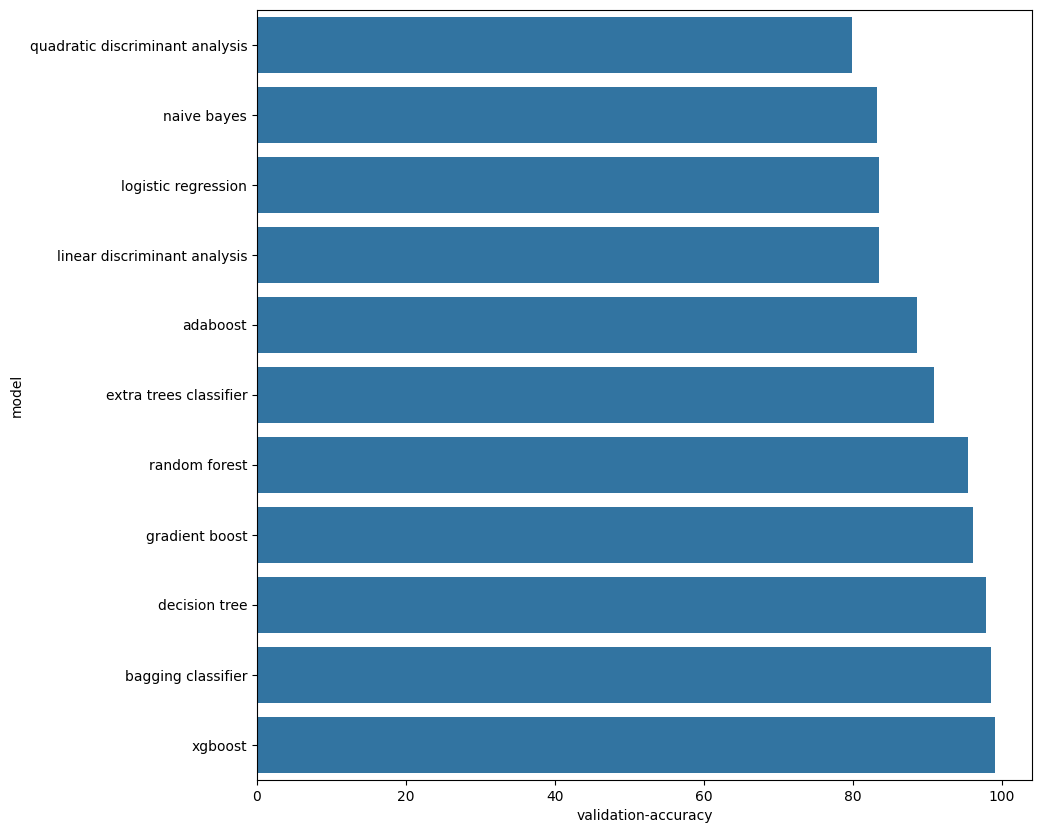

In [33]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

## Confusion Matrix

In [34]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [35]:
Label

['0', '1']

In [36]:
shw = 1
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label,shw)
fig2.show()

## Classification Report

In [37]:
shw = 1
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label,shw)
fig3.show()

## Plot Important Features by Weight

In [38]:
aka_plot.plot_important_features(model,df_filtered)